<a href="https://colab.research.google.com/github/kamangirkhan/Data/blob/main/CNN_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


## Load the MNIST Dataset

In [4]:
transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data  = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)

len(train_data), len(test_data)


100%|██████████| 26.4M/26.4M [00:02<00:00, 8.88MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 143kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.33MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.33MB/s]


(60000, 10000)

## Define a Simple CNN

Explanation:
Two convolution layers + two pooling layers + two fully connected layers.

In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.fc1 = nn.Linear(16*5*5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleCNN()
model


SimpleCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

## Train the Model

In [6]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(3):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss = {total_loss:.4f}")


Epoch 1, Loss = 634.7059
Epoch 2, Loss = 411.0876
Epoch 3, Loss = 363.9347


## Evaluate Accuracy

In [7]:
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {correct / total:.4f}")


Test Accuracy: 0.8622


## Visualize Learned Filters

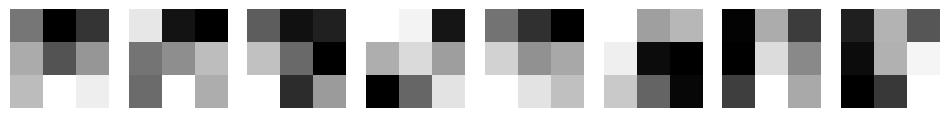

In [8]:
weights = model.conv1.weight.data

fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(weights[i, 0], cmap='gray')
    axes[i].axis('off')

plt.show()


## Visualize Model Predictions

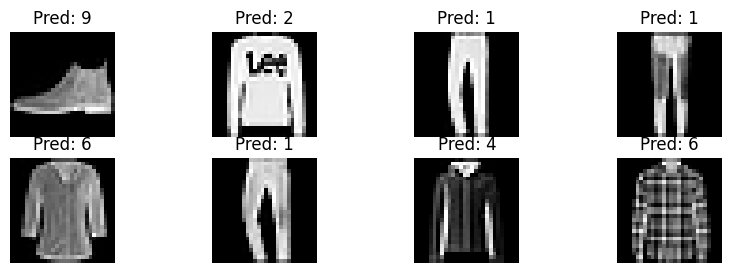

In [9]:
images, labels = next(iter(test_loader))
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(10, 3))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(images[i].squeeze(), cmap="gray")
    ax.set_title(f"Pred: {preds[i].item()}")
    ax.axis("off")
plt.show()
